### In this project we will try to predict whether a client will leave or stay with the bank in the future - a process also known as Churn modelling.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# View the version of the tensorflow
tf.__version__

'2.1.0'

In [3]:
# Read the dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check the shape of the data
# The dataset contains 10000 samples with each containing 14 features
data.shape

(10000, 14)

In [5]:
# Check if the data contains missing data
# The data contains no missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Remove the unnecessary columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# We have a few categorical features we need to encode
# These features are Gender and Geography
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop('Exited', axis=1).values
y = data['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [11]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Build the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 221us/sample - loss: 0.8645 - accuracy: 0.3658 - val_loss: 0.6825 - val_accuracy: 0.6115
Epoch 2/100
8000/8000 [==============================] - 0s 33us/sample - loss: 0.6324 - accuracy: 0.7613 - val_loss: 0.5970 - val_accuracy: 0.8060
Epoch 3/100
8000/8000 [==============================] - 0s 33us/sample - loss: 0.5791 - accuracy: 0.8043 - val_loss: 0.5591 - val_accuracy: 0.8100
Epoch 4/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.5460 - accuracy: 0.8086 - val_loss: 0.5274 - val_accuracy: 0.8185
Epoch 5/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.5153 - accuracy: 0.8186 - val_loss: 0.4960 - val_accuracy: 0.8290
Epoch 6/100
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4852 - accuracy: 0.8341 - val_loss: 0.4654 - val_accuracy: 0.8370
Epoch 7/100
8000/8000 [==============================] - 0s 33u

Epoch 56/100
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3348 - accuracy: 0.8614 - val_loss: 0.3375 - val_accuracy: 0.8635
Epoch 57/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3346 - accuracy: 0.8608 - val_loss: 0.3365 - val_accuracy: 0.8650
Epoch 58/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3344 - accuracy: 0.8611 - val_loss: 0.3384 - val_accuracy: 0.8620
Epoch 59/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3341 - accuracy: 0.8616 - val_loss: 0.3394 - val_accuracy: 0.8660
Epoch 60/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3341 - accuracy: 0.8611 - val_loss: 0.3389 - val_accuracy: 0.8650
Epoch 61/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3338 - accuracy: 0.8604 - val_loss: 0.3379 - val_accuracy: 0.8620
Epoch 62/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3341 - accuracy: 0.8601

In [13]:
model_hist = pd.DataFrame(model.history.history)
model_hist

,loss,accuracy,val_loss,val_accuracy
0,0.864548,0.365750,0.682518,0.6115
1,0.632422,0.761250,0.596983,0.8060
2,0.579086,0.804250,0.559091,0.8100
3,0.545978,0.808625,0.527440,0.8185
4,0.515347,0.818625,0.496049,0.8290
...,...,...,...,...
95,0.329821,0.861750,0.335986,0.8650
96,0.329588,0.862000,0.336654,0.8650
97,0.329672,0.860625,0.335490,0.8655
98,0.329683,0.859750,0.335842,0.8630


In [14]:
import matplotlib.pyplot as plt

plt.plot(model_hist['accuracy'], label="accuracy")
plt.plot(model_hist['val_accuracy'], label="validation accuracy")
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

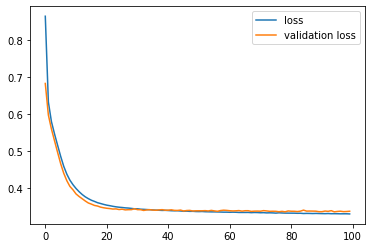

In [15]:
plt.plot(model_hist['loss'], label="loss")
plt.plot(model_hist['val_loss'], label="validation loss")
plt.legend()

plt.show()

In [16]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X_train[0]

array([ 0.75614761, -0.18122357,  0.33296061,  0.77793519, -0.90917706,
        0.65153774, -1.02378273,  0.32823832,  1.7194414 , -0.57696537,
        0.91878606])

In [18]:
# Do a single prediction
# Will the user with the following data leave the bank anytime soon?
# No because the predicted result is 0
observation = np.array([600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]).reshape(1,-1)
scaled_observation = scaler.transform(observation)
model.predict_classes([scaled_observation])

array([[0]])

In [19]:
y_pred = model.predict_classes(X_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
# Model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1543,   54],
       [ 217,  186]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred)

0.8645

In [22]:
# Let's improve the model


model = Sequential()
model.add(Dense(units=6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 69us/sample - loss: 0.5589 - accuracy: 0.7734 - val_loss: 0.4741 - val_accuracy: 0.7985
Epoch 2/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4559 - accuracy: 0.7958 - val_loss: 0.4455 - val_accuracy: 0.7985
Epoch 3/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.4366 - accuracy: 0.7958 - val_loss: 0.4351 - val_accuracy: 0.7985
Epoch 4/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.4297 - accuracy: 0.7958 - val_loss: 0.4317 - val_accuracy: 0.7985
Epoch 5/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.4257 - accuracy: 0.7958 - val_loss: 0.4289 - val_accuracy: 0.7985
Epoch 6/100
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4225 - accuracy: 0.7958 - val_loss: 0.4257 - val_accuracy: 0.7985
Epoch 7/100
8000/8000 [==============================] - 0s 37us

Epoch 56/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3298 - accuracy: 0.8625 - val_loss: 0.3441 - val_accuracy: 0.8675
Epoch 57/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3300 - accuracy: 0.8627 - val_loss: 0.3451 - val_accuracy: 0.8680
Epoch 58/100
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3290 - accuracy: 0.8637 - val_loss: 0.3448 - val_accuracy: 0.8665
Epoch 59/100
8000/8000 [==============================] - 0s 31us/sample - loss: 0.3291 - accuracy: 0.8634 - val_loss: 0.3441 - val_accuracy: 0.8675
Epoch 60/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3289 - accuracy: 0.8639 - val_loss: 0.3456 - val_accuracy: 0.8660
Epoch 61/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3290 - accuracy: 0.8640 - val_loss: 0.3459 - val_accuracy: 0.8675
Epoch 62/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3288 - accuracy: 0.8636

In [23]:
y_pred = model.predict_classes(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.867


array([[1527,   70],
       [ 196,  207]], dtype=int64)